In [37]:
#Tugas Ahkir Albert Samuel Pangihutan
#import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import SGD , Adadelta , Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [38]:
plt.style.use('seaborn')

In [39]:
df = pd.read_csv("forestfires.csv")

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

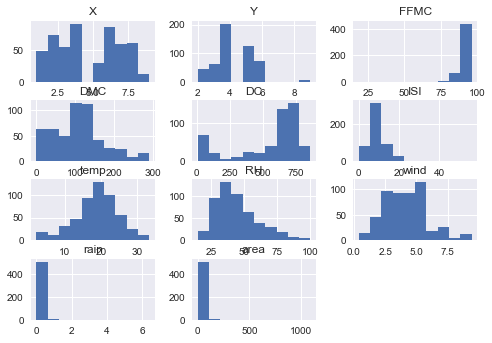

In [40]:
df.hist()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [42]:
le = LabelEncoder()
df["month"] = le.fit_transform(df["month"])
df["day"] = le.fit_transform(df["day"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int32  
 3   day     517 non-null    int32  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int32(2), int64(3)
memory usage: 48.6 KB


In [44]:
scaler = MinMaxScaler()
df['FFMC'] = scaler.fit_transform(df['FFMC'].values.reshape(-1,1))

In [45]:
df['DMC'] = scaler.fit_transform(df['DMC'].values.reshape(-1,1))
df['DC'] = scaler.fit_transform(df['DC'].values.reshape(-1,1))
df['area'] = scaler.fit_transform(df['area'].values.reshape(-1,1))

In [46]:
#membagi data menjadi feature dan klasifikasi
X = df.values[:,:12]
Y = df.values[:,12]

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

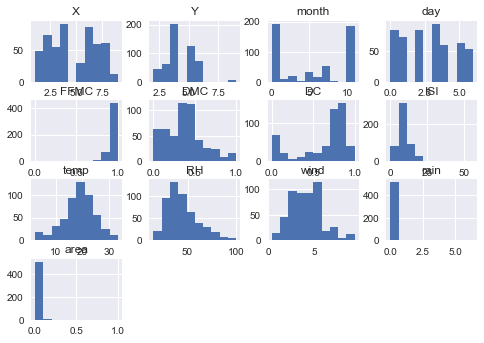

In [47]:
df.hist()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

Melihat perbedaan dengan pergantian jumlah epoch

In [49]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [52]:
epoch1 = model.fit(X_train ,y_train, epochs=200,  batch_size=16)

Epoch 1/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0017
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0097 - mse: 0.0017
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 5/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0017
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 11/200
26/26 [==============================] - 0s 1m

26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 88/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 89/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 90/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 91/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 92/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 93/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 94/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 95/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 96/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 97/200
26/26 [==============================] - 0s 1ms/st

26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 173/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 174/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 175/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 176/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 177/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 178/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 179/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 180/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 181/200
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 182/200
26/26 [==============================] -

In [53]:
epoch2= model.fit(X_train ,y_train, epochs=300,  batch_size=16)

Epoch 1/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 2/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 3/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 4/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 5/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 6/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 7/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 8/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 9/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 10/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 11/300
26/26 [==============================] - ETA: 

26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 87/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 88/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 89/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 90/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 91/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 92/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 93/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 94/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 95/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 96/300
26/26 [==============================] - 0s 1ms/st

26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 172/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 173/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 174/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 175/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 176/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 177/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 178/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 179/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 180/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 181/300
26/26 [==============================] -

Epoch 256/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 257/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 258/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 259/300
26/26 [==============================] - 0s 1000us/step - loss: 0.0094 - mse: 0.0017
Epoch 260/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 261/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 262/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 263/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 264/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 265/300
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 266/300
26/26 [================

In [54]:
epoch3 = model.fit(X_train ,y_train, epochs=250,  batch_size=16)

Epoch 1/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 2/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 3/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 4/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 5/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 6/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 8/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 9/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 10/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 11/250
26/26 [==============================] - 0s 1m

26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 88/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 89/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 90/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 91/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 92/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 93/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 94/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 95/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 96/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 97/250
26/26 [==============================] - 0s 1ms/st

26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 173/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 174/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 175/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 176/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 177/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 178/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 179/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 180/250
26/26 [==============================] - 0s 960us/step - loss: 0.0094 - mse: 0.0017
Epoch 181/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 182/250
26/26 [==============================]

dari hasil learning didapatkan bahwa tidak selalu semakin banyak epoch maka semakin baik hasil akurasi juga

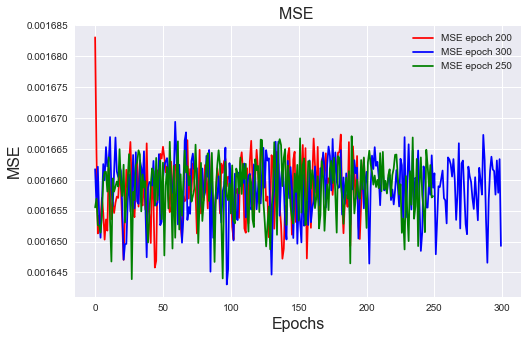

In [55]:
plt.figure(figsize=[8,5])
plt.plot(epoch1.history['mse'], 'r')
plt.plot(epoch2.history['mse'], 'b')
plt.plot(epoch3.history['mse'], 'g')
plt.legend(['MSE epoch 200', 'MSE epoch 300', 'MSE epoch 250'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE ', fontsize=16)

plt.show()

In [56]:
y_pred = model.predict(X_test)

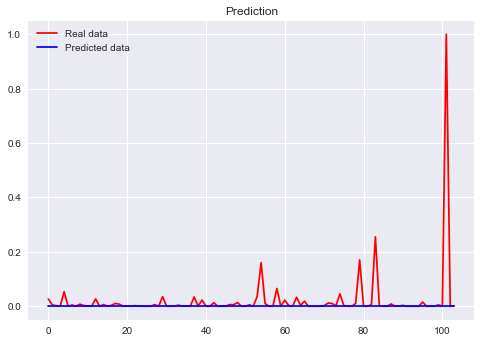

In [57]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [58]:
X = 7
Y = 5
month = 1
day = 5
FFMC = 5
DMC = 80
DC = 15
ISI = 26
temp = 90
RH = 3
wind = 7
rain = 17

In [59]:
target_input = [[X,Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain]]
target_input = np.asarray(target_input).astype(np.float32)
type(target_input)

numpy.ndarray

In [60]:
model.predict(target_input)

array([[0.04780152]], dtype=float32)

Melihat akurasi saat berbeda batch size

In [111]:
# create model
model2 = Sequential()
model2.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model2.add(Dense(8, kernel_initializer='normal',activation='relu'))
model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [112]:
# Compile model
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [107]:
#dari experiment sebelumnya dapat dilihat bahwa epoch 250 mendapatkan hasil yang paling baik sehingga akan menggunakan epoch 250
batch1 = model2.fit(X_train ,y_train, epochs=250,  batch_size=8)

Epoch 1/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0127 - mse: 0.0017
Epoch 2/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0106 - mse: 0.0016
Epoch 3/250
52/52 [==============================] - 0s 961us/step - loss: 0.0102 - mse: 0.0016
Epoch 4/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0098 - mse: 0.0016
Epoch 5/250
52/52 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0016
Epoch 6/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 7/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 8/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 9/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 11/250
52/52 [==============================] - 0s 

52/52 [==============================] - 0s 961us/step - loss: 0.0091 - mse: 0.0016
Epoch 87/250
52/52 [==============================] - 0s 961us/step - loss: 0.0092 - mse: 0.0016
Epoch 88/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 89/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 90/250
52/52 [==============================] - 0s 941us/step - loss: 0.0092 - mse: 0.0016
Epoch 91/250
52/52 [==============================] - 0s 941us/step - loss: 0.0092 - mse: 0.0016
Epoch 92/250
52/52 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 93/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 94/250
52/52 [==============================] - 0s 941us/step - loss: 0.0092 - mse: 0.0016  
Epoch 95/250
52/52 [==============================] - 0s 922us/step - loss: 0.0092 - mse: 0.0016
Epoch 96/250
52/52 [=======================

52/52 [==============================] - 0s 941us/step - loss: 0.0092 - mse: 0.0016
Epoch 170/250
52/52 [==============================] - 0s 961us/step - loss: 0.0091 - mse: 0.0016
Epoch 171/250
52/52 [==============================] - 0s 941us/step - loss: 0.0091 - mse: 0.0016
Epoch 172/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 173/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 174/250
52/52 [==============================] - 0s 941us/step - loss: 0.0089 - mse: 0.0016
Epoch 175/250
52/52 [==============================] - 0s 922us/step - loss: 0.0091 - mse: 0.0016
Epoch 176/250
52/52 [==============================] - 0s 922us/step - loss: 0.0090 - mse: 0.0016
Epoch 177/250
52/52 [==============================] - 0s 961us/step - loss: 0.0090 - mse: 0.0016
Epoch 178/250
52/52 [==============================] - 0s 941us/step - loss: 0.0090 - mse: 0.0016
Epoch 179/250
52/52 [=============

In [110]:
batch2 = model2.fit(X_train ,y_train, epochs=250,  batch_size=16)

Epoch 1/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0016 
Epoch 2/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0016
Epoch 3/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 4/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 5/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0017
Epoch 6/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 8/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 9/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/250
26/26 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0017
Epoch 11/250
26/26 [==============================] - 0s 1

26/26 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 88/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 89/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 90/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0016
Epoch 91/250
26/26 [==============================] - 0s 1000us/step - loss: 0.0093 - mse: 0.0017
Epoch 92/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 93/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 94/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 95/250
26/26 [==============================] - 0s 960us/step - loss: 0.0093 - mse: 0.0017
Epoch 96/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 97/250
26/26 [==============================] - 0s 1

26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 173/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 174/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 175/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 176/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 177/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 178/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 179/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 180/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 181/250
26/26 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 182/250
26/26 [==============================] -

In [113]:
batch3 = model2.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0017
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0016
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0103 - mse: 0.0016
Epoch 4/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0100 - mse: 0.0017
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0097 - mse: 0.0016
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 11/250
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 89/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 92/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 96/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 97/250
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 177/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 181/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 182/250
13/13 [==============================] -

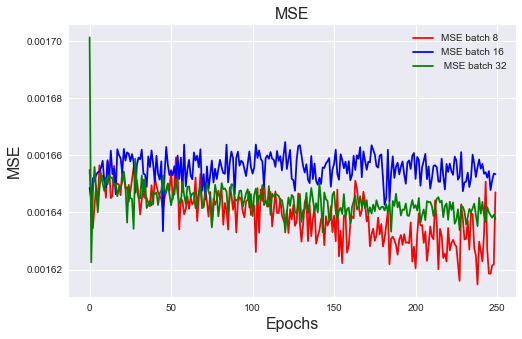

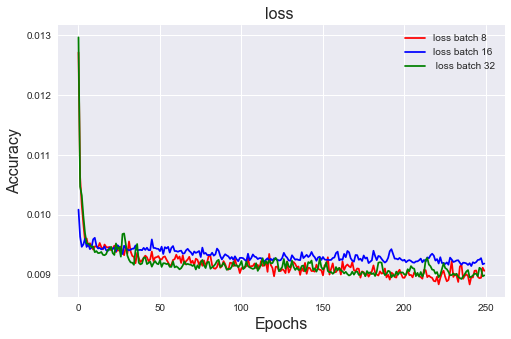

In [114]:
plt.figure(figsize=[8,5])
plt.plot(batch1.history['mse'], 'r')
plt.plot(batch2.history['mse'], 'b')
plt.plot(batch3.history['mse'], 'g')
plt.legend(['MSE batch 8', 'MSE batch 16', ' MSE batch 32'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE', fontsize=16)

plt.show()

plt.figure(figsize=[8,5])
plt.plot(batch1.history['loss'], 'r')
plt.plot(batch2.history['loss'], 'b')
plt.plot(batch3.history['loss'], 'g')
plt.legend(['loss batch 8', 'loss batch 16', ' loss batch 32'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('loss ', fontsize=16)
plt.show()

Dilihat kembali lagi tergantung pada data dimana diatas hampir setiap batch memiliki akurasi yang baik, dimana yg paling efisien adalah batch 8

Melihat akurasi pada perbedaan activation function

In [67]:
# create model untuk Linear
model3 = Sequential()
model3.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model3.add(Dense(8, kernel_initializer='normal',activation='relu'))
model3.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [68]:
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [69]:
Linear = model3.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - mse: 0.0017
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0017
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0016
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 11/250
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0016
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0016
Epoch 96/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 97/250
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0016
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0016
Epoch 177/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0016
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 181/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 182/250
13/13 [==============================] -

In [70]:
# create model untuk Relu
model4 = Sequential()
model4.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model4.add(Dense(8, kernel_initializer='normal',activation='relu'))
model4.add(Dense(1, kernel_initializer='normal',activation='relu'))

In [71]:
model4.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [72]:
Relu = model4.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 11/250
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 87/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 96/250
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 172/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 175/250
13/13 [==============================] - ETA: 0s - loss: 0.0189 - mse: 0.002 - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 177/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 181/250
13

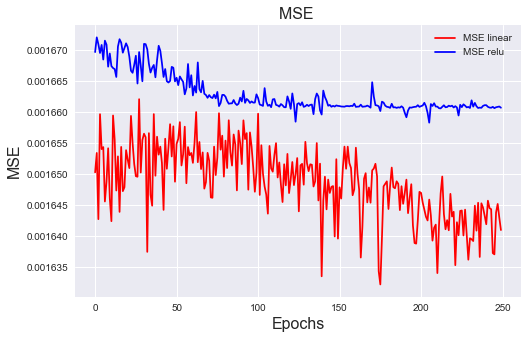

In [73]:
plt.figure(figsize=[8,5])
plt.plot(Linear.history['mse'], 'r')
plt.plot(Relu.history['mse'], 'b')
plt.legend(['MSE linear', 'MSE relu'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE ', fontsize=16)

plt.show()

didapat bahwa sistem dengan fungsi aktivasi relu terkadang cenderung tidak belajar, dimana linear lebih baik dibandingkan relu

Melihat akurasi dengan perbedaan loss function

In [74]:
# create model untuk Mean absolute error dengan pilihan batch epoch dan fungsi aktivasi terbaik
model5 = Sequential()
model5.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model5.add(Dense(8, kernel_initializer='normal',activation='relu'))
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [75]:
model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [76]:
Mae = model5.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0139 - mse: 0.0016
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0016
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0017
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0098 - mse: 0.0016
Epoch 5/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0016
Epoch 6/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 11/250
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0016
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0016
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0016
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 94/250
13/13 [==============================] - ETA: 0s - loss: 0.0024 - mse: 1.0061e-0 - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 96/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 97/250
13/13 [=

13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 176/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0016
Epoch 177/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0016
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0090 - mse: 0.0016
Epoch 181/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 182/250
13/13 [==============================] -

In [77]:
# create model untuk Mean squared error dengan pilihan batch epoch dan fungsi aktivasi terbaik
model6 = Sequential()
model6.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model6.add(Dense(8, kernel_initializer='normal',activation='relu'))
model6.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [78]:
model6.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [79]:
Mse = model6.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 7/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 11/250
13/13 [=======

13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 86/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 87/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 95/250
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 169/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 170/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 171/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 172/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 177/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 178/250
13/13 [=

13/13 [==============================] - 0s 1ms/step - loss: 8.4252e-04 - mse: 8.4252e-04
Epoch 249/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 250/250
13/13 [==============================] - 0s 1ms/step - loss: 8.7698e-04 - mse: 8.7698e-04


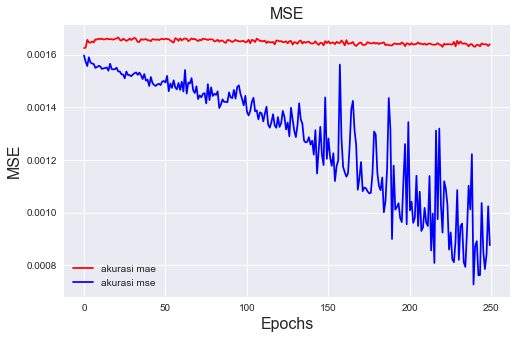

In [80]:
plt.figure(figsize=[8,5])
plt.plot(Mae.history['mse'], 'r')
plt.plot(Mse.history['mse'], 'b')
plt.legend(['akurasi mae', 'akurasi mse'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE', fontsize=16)

plt.show()

Dapat dilihat bahwa MSE lebih baik daripada MAE

Perbandingan dengan perbedaan Optimizer

In [127]:
model7 = Sequential()
model7.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model7.add(Dense(8, kernel_initializer='normal',activation='relu'))
model7.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [128]:
#menggunakan OPT adam
model7.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

In [129]:
adam = model7.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0017
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0100 - mse: 0.0017
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0016
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 5/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0017
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - mse: 0.0017
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0016
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0017
Epoch 11/250
13/13 [==============================] - 0s 1m

13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 87/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0017
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0016
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0017
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0016
Epoch 96/250
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0016
Epoch 172/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0017
Epoch 173/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 174/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 175/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0016
Epoch 176/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0017
Epoch 177/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0017
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0017
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0016
Epoch 181/250
13/13 [==============================] -

In [130]:
model8 = Sequential()
model8.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model8.add(Dense(8, kernel_initializer='normal',activation='relu'))
model8.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [131]:
#menggunakan OPT SGD
model8.compile(loss='mean_absolute_error', optimizer='SGD', metrics=['mse'])

In [132]:
sgd = model8.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0106 - mse: 0.0016
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0017
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0108 - mse: 0.0016
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0016
Epoch 5/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0016
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0016
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0016
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0108 - mse: 0.0017
Epoch 9/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0016
Epoch 10/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0017
Epoch 11/250
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 1ms/step - loss: 0.0111 - mse: 0.0016
Epoch 87/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0102 - mse: 0.0016
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - mse: 0.0016
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0106 - mse: 0.0017
Epoch 90/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0017
Epoch 91/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0016
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0017
Epoch 93/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0016
Epoch 94/250
13/13 [==============================] - 0s 3ms/step - loss: 0.0105 - mse: 0.0016
Epoch 95/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0016
Epoch 96/250
13/13 [==============================] - 0s 2ms/st

13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - mse: 0.0016
Epoch 172/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0107 - mse: 0.0016
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0108 - mse: 0.0016
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0016
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0110 - mse: 0.0016
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - mse: 0.0016
Epoch 177/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0105 - mse: 0.0016
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0106 - mse: 0.0016
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - mse: 0.0017
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0108 - mse: 0.0017
Epoch 181/250
13/13 [==============================] -

In [133]:
model9 = Sequential()
model9.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model9.add(Dense(8, kernel_initializer='normal',activation='relu'))
model9.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [134]:
#menggunakan OPT Adadelta
model9.compile(loss='mean_absolute_error', optimizer='Adadelta', metrics=['mse'])

In [135]:
ada = model9.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - mse: 0.0033
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0413 - mse: 0.0033
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0412 - mse: 0.0033
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - mse: 0.0033
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - mse: 0.0033
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0407 - mse: 0.0033
Epoch 7/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0033
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0404 - mse: 0.0033
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0403 - mse: 0.0033
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0401 - mse: 0.0032
Epoch 11/250
13/13 [==============================] - 0s 2m

13/13 [==============================] - 0s 1ms/step - loss: 0.0223 - mse: 0.0021
Epoch 87/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0219 - mse: 0.0021
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0216 - mse: 0.0021
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0212 - mse: 0.0021
Epoch 90/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0208 - mse: 0.0020
Epoch 91/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0204 - mse: 0.0020
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0200 - mse: 0.0020
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0196 - mse: 0.0020
Epoch 94/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0192 - mse: 0.0020
Epoch 95/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0189 - mse: 0.0020
Epoch 96/250
13/13 [==============================] - 0s 1ms/st

13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 172/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 177/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 178/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 179/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 180/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0017
Epoch 181/250
13/13 [==============================] -

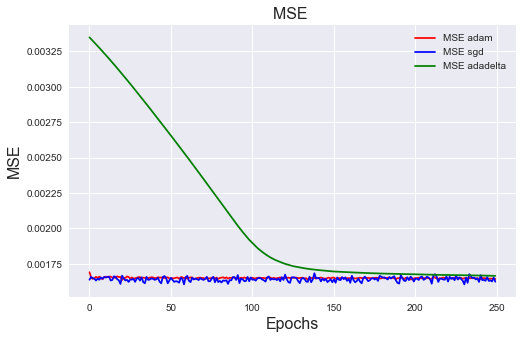

In [136]:
plt.figure(figsize=[8,5])
plt.plot(adam.history['mse'], 'r')
plt.plot(sgd.history['mse'], 'b')
plt.plot(ada.history['mse'], 'g')
plt.legend(['MSE adam', 'MSE sgd','MSE adadelta'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE ', fontsize=16)

plt.show()

dilihat dari hasil visualisasi bahwa optimizer adam dan sgd keluar sebagai yang terbaik dimana  adadelta tertinggal dalam waktu yang dibutuhkan untuk belajar

Perbandingan dengan perbedaan Learning Rate

In [91]:
# fit a model and plot learning curve
def fit_model(X_train,y_train,lrate):
    
    # define model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))

    # compile model
    opt = Adam(learning_rate=lrate)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
    
    # fit model
    hasil = model.fit(X_train,y_train, epochs=200, batch_size=32 ,verbose=0)
    
    # plot learning curves
    plt.plot(hasil.history['mse'], label='train')
    plt.title('lrate='+str(lrate))
    plt.legend()

In [92]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3]

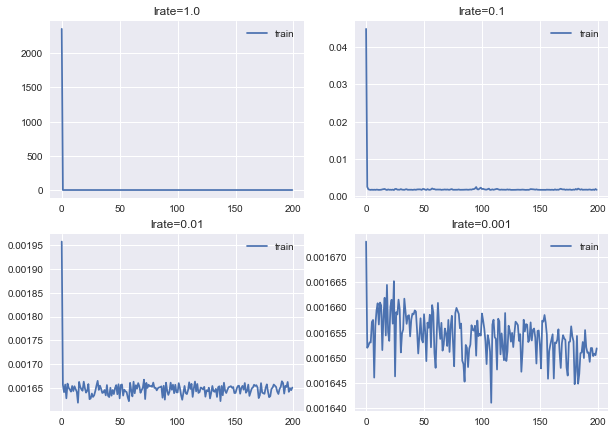

In [93]:
plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, learning_rates[i])

# show learning curves
plt.show()

dapat dilihat bahwa learning rate yang dicoba hanya sedikit mempengaruhi model

setelah uji coba maka akan menemukan yang paling baik

In [94]:
model11 = Sequential()
model11.add(Dense(12, input_dim=12, kernel_initializer='uniform', activation='relu'))
model11.add(Dense(8, kernel_initializer='uniform',activation='relu'))
model11.add(Dense(1, kernel_initializer='uniform',activation='linear'))

In [95]:
model11.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [96]:
fix = model11.fit(X_train ,y_train, epochs=250,  batch_size=32)

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017    
Epoch 2/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 3/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 4/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 5/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 6/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 7/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 8/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 9/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 10/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 11/250
13/13 [===

13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 85/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 86/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 87/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 88/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 89/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 90/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 91/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 92/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 93/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 94/250
13/13 [=======================

13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 168/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 169/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 170/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 171/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 172/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 173/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 174/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 175/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 176/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 177/250
13/13 [=====

13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 250/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    


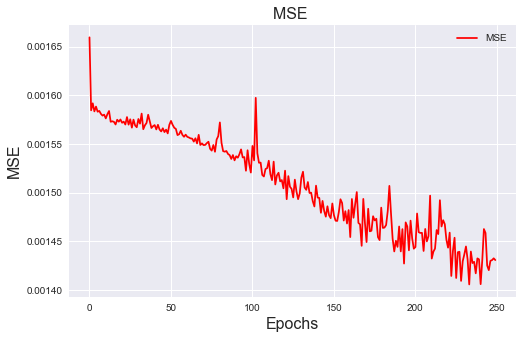

In [97]:
plt.figure(figsize=[8,5])
plt.plot(fix.history['mse'], 'r')
plt.legend(['MSE'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE ', fontsize=16)

plt.show()

In [98]:
y_pred = model11.predict(X_test)

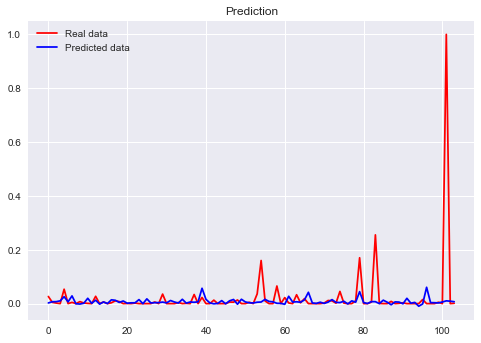

In [99]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [125]:
model11.evaluate(X_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014


[0.0014010275481268764, 0.0014010275481268764]

In [120]:
model12 = Sequential()
model12.add(Dense(12, input_dim=12, kernel_initializer='uniform', activation='relu'))
model12.add(Dense(8, kernel_initializer='uniform',activation='relu'))
model12.add(Dense(1, kernel_initializer='uniform',activation='linear'))

In [121]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [122]:
model12.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [123]:
history1 = model12.fit(X_train, y_train, epochs=250,batch_size=32, callbacks=[es])

Epoch 1/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016
Epoch 2/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 4/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 5/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 6/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 7/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 8/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 9/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 10/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 11/250
13/13 [===

Epoch 28/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 29/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 30/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 31/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 32/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016    
Epoch 33/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 34/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 35/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015
Epoch 36/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 37/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 38/250
1

Epoch 55/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 56/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 57/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 58/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 59/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 60/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 61/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 62/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 63/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 64/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 65/2

Epoch 82/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 83/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 84/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 85/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 86/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 87/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 88/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 89/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 90/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015    
Epoch 91/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 92/250
13/13 [======

Epoch 109/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 110/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 111/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 112/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 113/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 114/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014
Epoch 115/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 116/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 117/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015
Epoch 118/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 119/25

Epoch 136/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 137/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 138/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 139/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 140/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013
Epoch 141/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 142/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 143/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 144/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013
Epoch 145/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 14

13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 163/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 164/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014    
Epoch 165/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 166/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 167/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 168/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 169/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 170/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 171/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013    
Epoch 172/250
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 190/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 191/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 192/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 193/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 194/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 195/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 196/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012
Epoch 197/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 198/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 199/250
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 217/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 218/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 219/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012
Epoch 220/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 221/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012    
Epoch 222/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 223/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013
Epoch 224/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013
Epoch 225/250
13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 226/250
13/13 [=============

13/13 [==============================] - 0s 1ms/step - loss: 9.7381e-04 - mse: 9.7381e-04
Epoch 244/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 245/250
13/13 [==============================] - 0s 1ms/step - loss: 9.5555e-04 - mse: 9.5555e-04
Epoch 246/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    
Epoch 247/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 248/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 249/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010    
Epoch 250/250
13/13 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011    


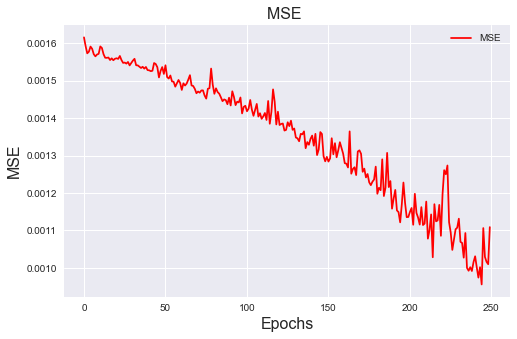

In [124]:
plt.figure(figsize=[8,5])
plt.plot(history1.history['mse'], 'r')
plt.legend(['MSE'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE ', fontsize=16)

plt.show()

In [126]:
model12.evaluate(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 9.6944e-04 - mse: 9.6944e-04


[0.0009694363689050078, 0.0009694363689050078]

Dapat dilihat dengan adanya early stopping lebih stabil dan errornya lebih rendah dibanding tanpa ES